# ***Cardiovascular Risk factors***

## **Introduction**
Cardiovascular diseases (CVDs) are a group of disorders that affect the heart and blood vessels, and they represent the leading cause of death worldwide. To effectively prevent and manage these conditions, it is essential to understand the risk factors that contribute to their development.

Cardiovascular risk factors are traits or conditions that increase the likelihood of developing heart-related illnesses. These risk factors are typically divided into two categories: modifiable and non-modifiable.

**Modifiable risk factors** are those that can be influenced through changes in behavior or lifestyle. Examples include high blood pressure, high cholesterol, diabetes, smoking, obesity, physical inactivity, poor dietary habits, and excessive alcohol consumption. Because these factors are controllable, they offer significant opportunities for prevention and intervention.

On the other hand, **non-modifiable risk factors** are those that cannot be changed. These include age, gender, family history of cardiovascular disease, and ethnicity. While these factors are beyond an individual's control, they are important for identifying those who may be at greater risk and guiding screening and monitoring efforts.

Analyzing cardiovascular risk factors is important for several reasons. It helps identify individuals who are at high risk and may benefit from early interventions. It also supports the development of targeted public health programs, informs clinical decision-making,


## *Problem Statement*

Cardiovascular diseases (CVDs) remain the leading cause of death globally, making early detection and risk factor analysis a critical area of focus for both public health and clinical decision-making. Despite the availability of medical check-up data, timely diagnosis is still a challenge due to the multifactorial nature of heart disease.

This project aims to leverage machine learning and data analysis techniques to identify and quantify key risk factors associated with cardiovascular disease. Using patient health metrics—such as blood pressure, cholesterol levels, BMI, and lifestyle attributes—we seek to build predictive models that can classify individuals as at risk or not at risk for cardiovascular events.

The goal is to provide a data-driven tool that can assist healthcare professionals in identifying high-risk individuals early, enabling more targeted prevention strategies and better resource allocation.


## *Objectives*

The main objectives of this project are as follows:

- To perform **exploratory data analysis (EDA)** on variables that are potentially associated with cardiovascular disease.
- To develop a **baseline model** for initial performance benchmarking.
- To build a **machine learning model** capable of predicting an individual's risk of developing cardiovascular disease.
- To **evaluate the performance** of the model using appropriate metrics and perform **hyperparameter tuning** to optimize results, if necessary.


## **Dataset**

The dataset used for this analysis is sourced from Kaggle and contains health-related records for 70,000 individuals. Each record includes various features that may contribute to the risk of developing cardiovascular disease.

The target variable is **cardiovascular disease**, which indicates whether an individual has been diagnosed with the condition (`1`) or not (`0`).

The dataset is relatively clean, with minimal inconsistencies, making it suitable for analysis without extensive preprocessing. However, some feature engineering will be necessary to extract more meaningful insights and better align the data with our analysis objectives.

Key tasks will include transforming and deriving new features from existing columns to improve model performance and enhance interpretability.


## **Data Preprocessing**

## *Importing The Necessary Libraries*

In [ ]:
#importing the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## *Loading The Dataset*

We start by loading the dataset into a dataframe and assigning it a variable name.

In [425]:
# loading the dataset
df=pd.read_csv("cardio_train.csv",header=None)
df



,0
0,id;age;gender;height;weight;ap_hi;ap_lo;choles...
1,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
2,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
3,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
4,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
...,...
69996,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69997,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69998,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69999,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


Upon loading the dataset using pandas, all the data was initially read into a single column. This occurred because the dataset uses a semicolon (`;`) as a delimiter, rather than the default comma (`,`).

To resolve this, we will manually split the single column into multiple columns by using the semicolon as a delimiter. This can be done using the `str.split()` method combined with `expand=True` to separate the values into distinct columns.

Once the data is correctly formatted, we will assign appropriate column names and proceed with further preprocessing and analysis.


In [426]:
#expanding the semicolon separated values into specific columns
df_stripped=df[0].str.split(";",expand=True)

In [427]:
# returning the header row
df_stripped.columns=df_stripped.iloc[0]
df_new=df_stripped[1:]

In [428]:
# defining the index column and viewing the dataframe
df_new.set_index("id")

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


### Dataset Structure

After resolving the formatting issue and transforming the dataset into its correct structure, we now have a clean DataFrame with meaningful columns, ready for analysis.

The main columns in the dataset are as follows:

- **age**: Age of the individual (in days)
- **gender**: Gender (1 = female, 2 = male)
- **height**: Height of the individual (in cm)
- **weight**: Weight of the individual (in kg)
- **ap_hi**: Systolic blood pressure
- **ap_lo**: Diastolic blood pressure
- **cholesterol**: Cholesterol level (1 = normal, 2 = above normal, 3 = well above normal)
- **gluc**: Glucose level (1 = normal, 2 = above normal, 3 = well above normal)
- **smoke**: Smoking status (1 = smoker, 0 = non-smoker)
- **alco**: Alcohol consumption (1 = consumes alcohol, 0 = does not)
- **active**: Physical activity (1 = active, 0 = not active)
- **cardio**: Presence of cardiovascular disease (1 = has condition, 0 = does not)

This structure allows us to perform exploratory data analysis (EDA), feature engineering, and model development effectively.


## *Summary of the dataset*

Before diving into analysis, it's important to examine the overall structure of the dataset. This step helps us verify that the data has been loaded correctly, understand the types of each feature, and identify any potential issues such as missing values or incorrect data types.



In [429]:
# viewing summary of the dataset
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 1 to 70000
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           70000 non-null  object
 1   age          70000 non-null  object
 2   gender       70000 non-null  object
 3   height       70000 non-null  object
 4   weight       70000 non-null  object
 5   ap_hi        70000 non-null  object
 6   ap_lo        70000 non-null  object
 7   cholesterol  70000 non-null  object
 8   gluc         70000 non-null  object
 9   smoke        70000 non-null  object
 10  alco         70000 non-null  object
 11  active       70000 non-null  object
 12  cardio       70000 non-null  object
dtypes: object(13)
memory usage: 6.9+ MB


The dataset consists of 70,000 records with 13 columns in total. An initial inspection confirms that there are no missing values, which simplifies the preprocessing steps.

However, all the columns have been loaded as object types, meaning that the data is currently stored as strings. This indicates that we need to convert several columns to their correct numerical data types—such as integers or floats—before performing any meaningful analysis or modeling. Proper type casting is essential to ensure accurate computations and to apply appropriate machine learning algorithms.


## Checking for Duplicates

It is important to check for duplicate records in the dataset, as duplicates can compromise data integrity. Duplicate entries may bias the analysis, lead to overfitting in models, and give misleading insights.



In [430]:
# checking for duplicates
df_new.duplicated().sum()

0

We see that the dataset had no duplicates.

## *Casting Columns*

In this step, we convert the columns to their appropriate data types. Properly casting the data ensures that numerical operations, statistical analyses, and machine learning algorithms can be applied correctly and efficiently.




In [431]:
# casting the numerical columns into integers
df_new1=df_new.copy()
df_new1[["id","age","height","weight","ap_hi","ap_lo"]]=df_new1[["id","age","height","weight","ap_hi","ap_lo"]].astype(float)

In [432]:
# checking for the new data types
df_new1.dtypes

0
id             float64
age            float64
gender          object
height         float64
weight         float64
ap_hi          float64
ap_lo          float64
cholesterol     object
gluc            object
smoke           object
alco            object
active          object
cardio          object
dtype: object

After casting the columns to their appropriate data types, we confirm that each column now reflects the correct type.


## *Transforming the Columns*

In this step, we will transform certain columns into more meaningful or preferred units. This is essential for improving the interpretability of the data, facilitating effective feature engineering, and ensuring consistency during analysis.



We will start by transforming the age column from age in days to age in years for better interpretability.

In [433]:
# coverting age from days to years
df_new2=df_new1.copy()
df_new2["age"]=df_new2["age"]/365
# casting the age column into an integer
df_new2["age"]=df_new2["age"].astype(int)


Also we will need to transform the height column from height in centimeters to height in meters to help us when engineering the BMI column.

In [434]:
# changing height to be in metres
df_new2["height"]=df_new2["height"]/100
df_new2["height"].sample(5)

14710    1.58
36133    1.54
63078    1.57
5907     1.49
69770    1.72
Name: height, dtype: float64

## *Feature Engineering*

In this step, we will generate additional features derived from the existing variables in our dataset. These engineered features are intended to capture more meaningful patterns and relationships that may not be immediately apparent from the raw data.



We begin the feature engineering process by creating a new column for **Body Mass Index (BMI)**, which is a widely used indicator of body fat based on a person's height and weight.

The formula for calculating BMI is:

$$
\text{BMI} = \frac{\text{weight (kg)}}{(\text{height (m)})^2}
$$

The BMI column is a good representative of the `height` and `weight` columns


In [435]:
# engeneering the BMI column
df_new2["BMI"]=df_new2["weight"]/(df_new2["height"]**2)
df_new2["BMI"].sample(5)

57855    20.173253
56328    25.887574
1390     27.053803
685      29.721079
69503    25.951557
Name: BMI, dtype: float64

Next, we create a new feature called **Pulse Pressure**, which is calculated as the difference between systolic and diastolic blood pressure:

$$
\text{Pulse Pressure} = \text{ap\_hi} - \text{ap\_lo}
$$

Pulse pressure is an important cardiovascular metric that reflects the force that the heart generates with each contraction. It can serve as a more informative and consolidated representation of the `ap_hi` (systolic) and `ap_lo` (diastolic) blood pressure values.

Including this feature may help improve the model's ability to detect patterns related to cardiovascular risk.


In [436]:
# engineering a pulse pressure column
df_new2["pulse_pressure"]=df_new2["ap_hi"]-df_new2["ap_lo"]

## *Duplicating The Clean Df For Analysis*

In [437]:
# copying the clean dataset to use for analysis
df_clean=df_new2.drop(["height","weight"],axis=1).copy()
df_clean

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,pulse_pressure
1,0.0,50,2,110.0,80.0,1,1,0,0,1,0,21.967120,30.0
2,1.0,55,1,140.0,90.0,3,1,0,0,1,1,34.927679,50.0
3,2.0,51,1,130.0,70.0,3,1,0,0,0,1,23.507805,60.0
4,3.0,48,2,150.0,100.0,1,1,0,0,1,1,28.710479,50.0
5,4.0,47,1,100.0,60.0,1,1,0,0,0,0,23.011177,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,99993.0,52,2,120.0,80.0,1,1,1,0,1,0,26.927438,40.0
69997,99995.0,61,1,140.0,90.0,2,2,0,0,1,1,50.472681,50.0
69998,99996.0,52,2,180.0,90.0,3,1,0,1,0,1,31.353579,90.0
69999,99998.0,61,1,135.0,80.0,1,2,0,0,0,1,27.099251,55.0


## **Exploratory Data Analysis**

## *Dataset's Description*

In [438]:
# describing the numerical columns
df_clean.describe()

,id,age,ap_hi,ap_lo,BMI,pulse_pressure
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,128.817286,96.630414,27.556513,32.186871
std,28851.302323,6.766774,154.011419,188.472530,6.091511,241.469638
min,0.000000,29.000000,-150.000000,-70.000000,3.471784,-10800.000000
25%,25006.750000,48.000000,120.000000,80.000000,23.875115,40.000000
50%,50001.500000,53.000000,120.000000,80.000000,26.374068,40.000000
75%,74889.250000,58.000000,140.000000,90.000000,30.222222,50.000000
max,99999.000000,64.000000,16020.000000,11000.000000,298.666667,15940.000000


## *Distribution Plots*

c:\Users\HomePC\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


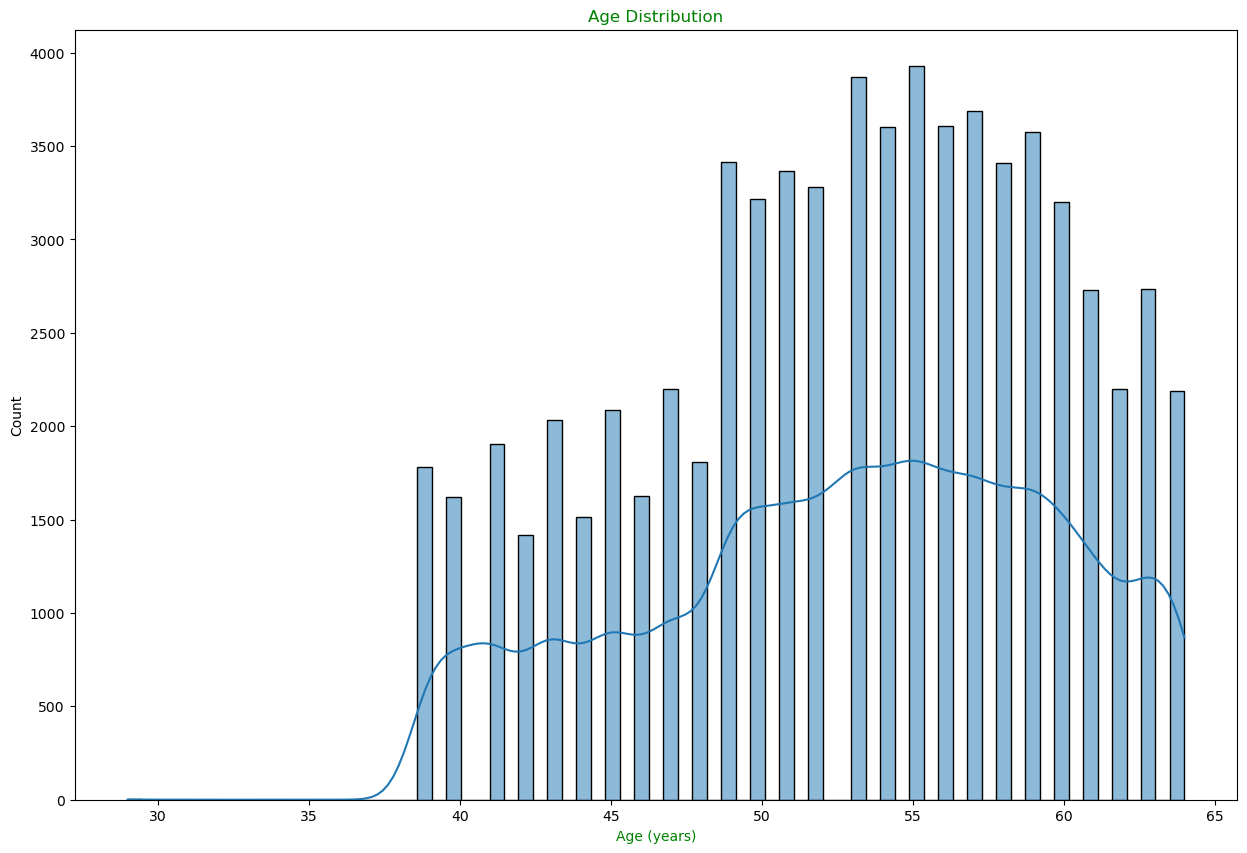

In [439]:
# Plot histogram of age in years
plt.figure(figsize=(15,10))
sns.histplot(x="age", data=df_clean,kde=True)
plt.xlabel("Age (years)",color="g")
plt.title("Age Distribution",color="g")
plt.show()

We observe that the **age** variable is approximately **normally distributed**, with most values symmetrically centered around the **mean**. This suggests that age follows a bell-shaped distribution, which is useful for statistical modeling and inference.


c:\Users\HomePC\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


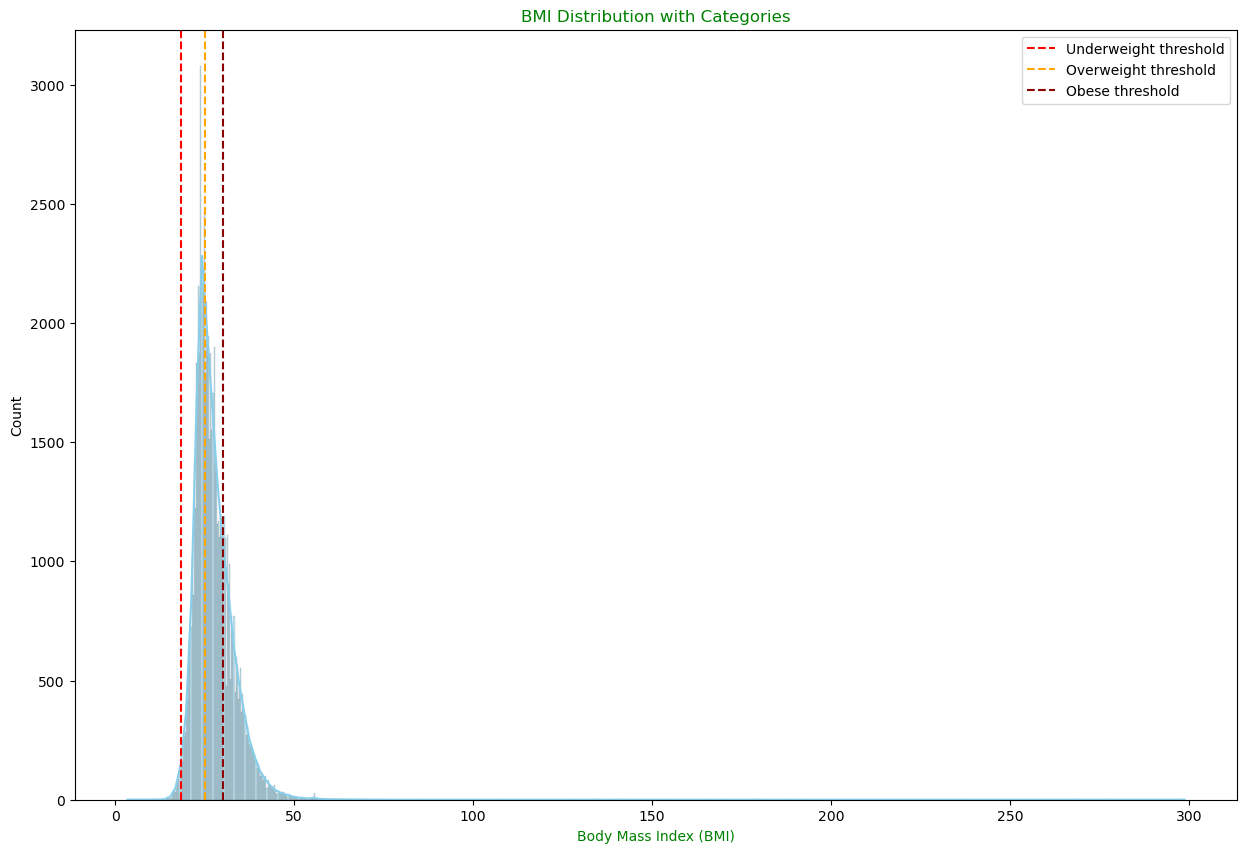

In [440]:

# Plot BMI histogram
plt.figure(figsize=(15,10))
sns.histplot(x="BMI", data=df_clean, kde=True, color='skyblue')

# Add vertical lines for category thresholds
plt.axvline(x=18.5, color='red', linestyle='--', label='Underweight threshold')
plt.axvline(x=25, color='orange', linestyle='--', label='Overweight threshold')
plt.axvline(x=30, color='darkred', linestyle='--', label='Obese threshold')

# Customize plot
plt.xlabel("Body Mass Index (BMI)",color="g")
plt.title("BMI Distribution with Categories",color="g")
plt.legend()
plt.show()

 The **BMI** variable appears to be **normally distributed**, with most values symmetrically centered around the **overweight threshold**. 


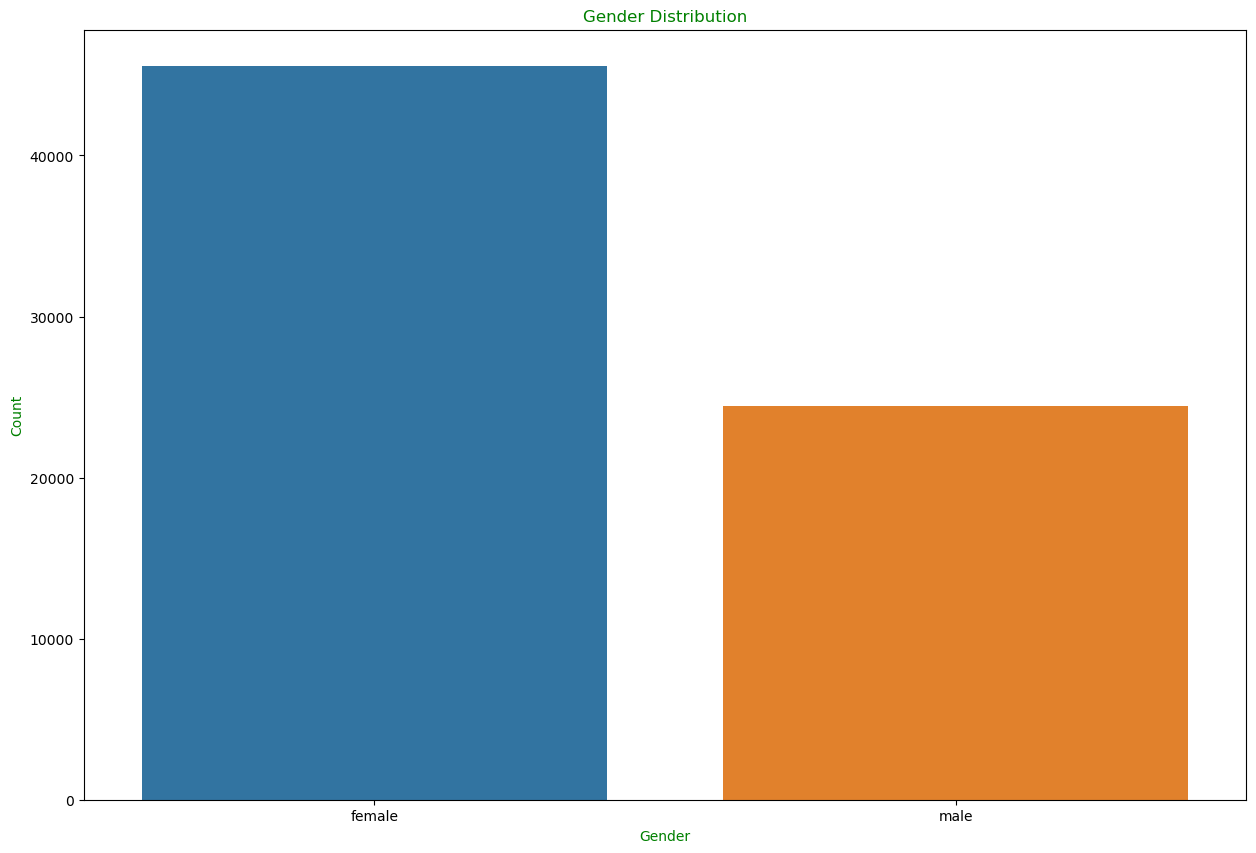

In [441]:
# Create a bar plot of gender distribution
gender_value_counts=df_new2["gender"].value_counts()
plt.figure(figsize=(15, 10))  
sns.barplot(x=gender_value_counts.index, y=gender_value_counts.values)

# Add labels and title
plt.xlabel("Gender",color="g")
plt.ylabel("Count",color="g")
plt.title("Gender Distribution",color="g")
plt.xticks([0,1],["female","male"])
plt.show()


There are significantly more records for **females** than **males** in the dataset. This imbalance could **skew the analysis**, particularly in any comparisons or models involving gender as a factor.


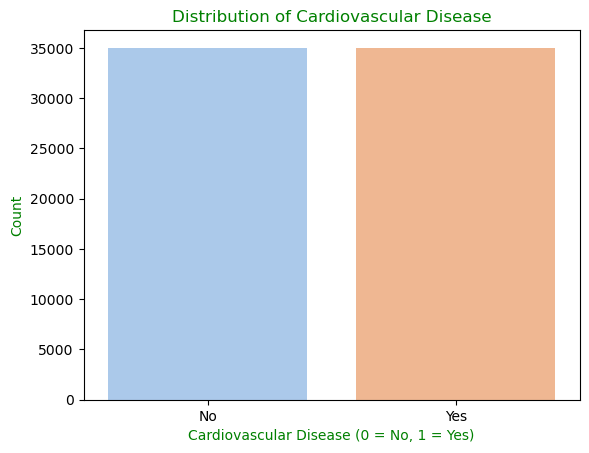

In [442]:
# Get value counts of the target variable
cardio_counts = df_clean["cardio"].value_counts()

# Create the figure and bar plot
plt.Figure(figsize=(10, 6))  
sns.barplot(x=cardio_counts.index, y=cardio_counts.values, palette="pastel")

# Add labels and title
plt.xlabel("Cardiovascular Disease (0 = No, 1 = Yes)",color="g")
plt.ylabel("Count",color="g")
plt.title("Distribution of Cardiovascular Disease",color="g")
plt.xticks([0, 1], ["No", "Yes"])

plt.show()


The dataset contains an approximately **equal number of individuals with and without cardiovascular disease**, indicating that the target variable is **balanced**. This is beneficial for training machine learning models, as it reduces the risk of bias toward one class.


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,pulse_pressure
0,,,,,,,,,,,,,
id,1.000000,0.003814,0.003502,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,-0.001377,0.004114
age,0.003814,1.000000,-0.022913,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985,0.085404,-0.000451
gender,0.003502,-0.022913,1.000000,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.096529,-0.008076
ap_hi,0.003356,0.020854,0.006005,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.024852,0.625254
ap_lo,-0.002529,0.017620,0.015254,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.035345,-0.770263
cholesterol,0.006106,0.154012,-0.035821,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.146270,-0.003582
gluc,0.002467,0.098388,-0.020491,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.101390,-0.000882
smoke,-0.003699,-0.047649,0.338135,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.027215,-0.004636
alco,0.001210,-0.029756,0.170966,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,0.014394,-0.007376


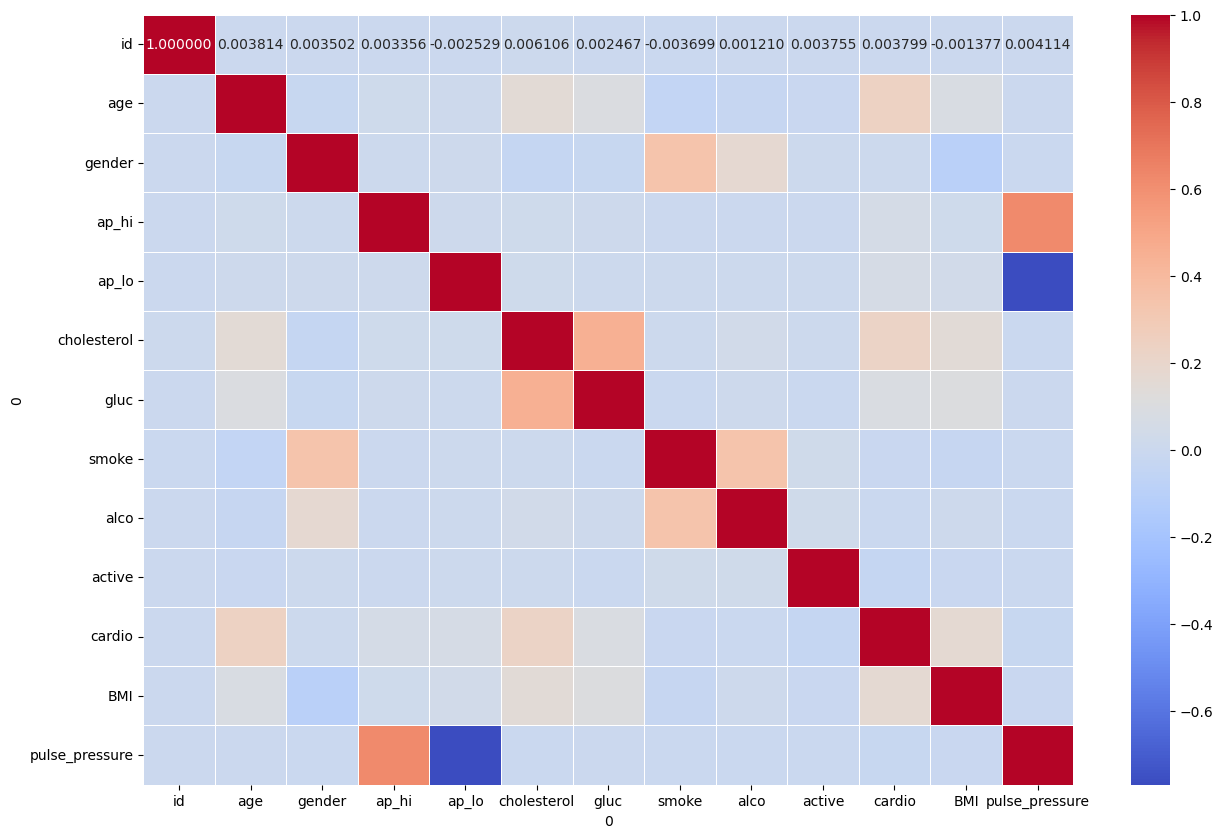

In [443]:
# plotting a correlation matrix
correlation_matrix=df_clean.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",linewidths=0.5,fmt='2f')
correlation_matrix

## *Bar plots of each predictor variable against the target variable*

### *Cardio Condition By Smoking Status*

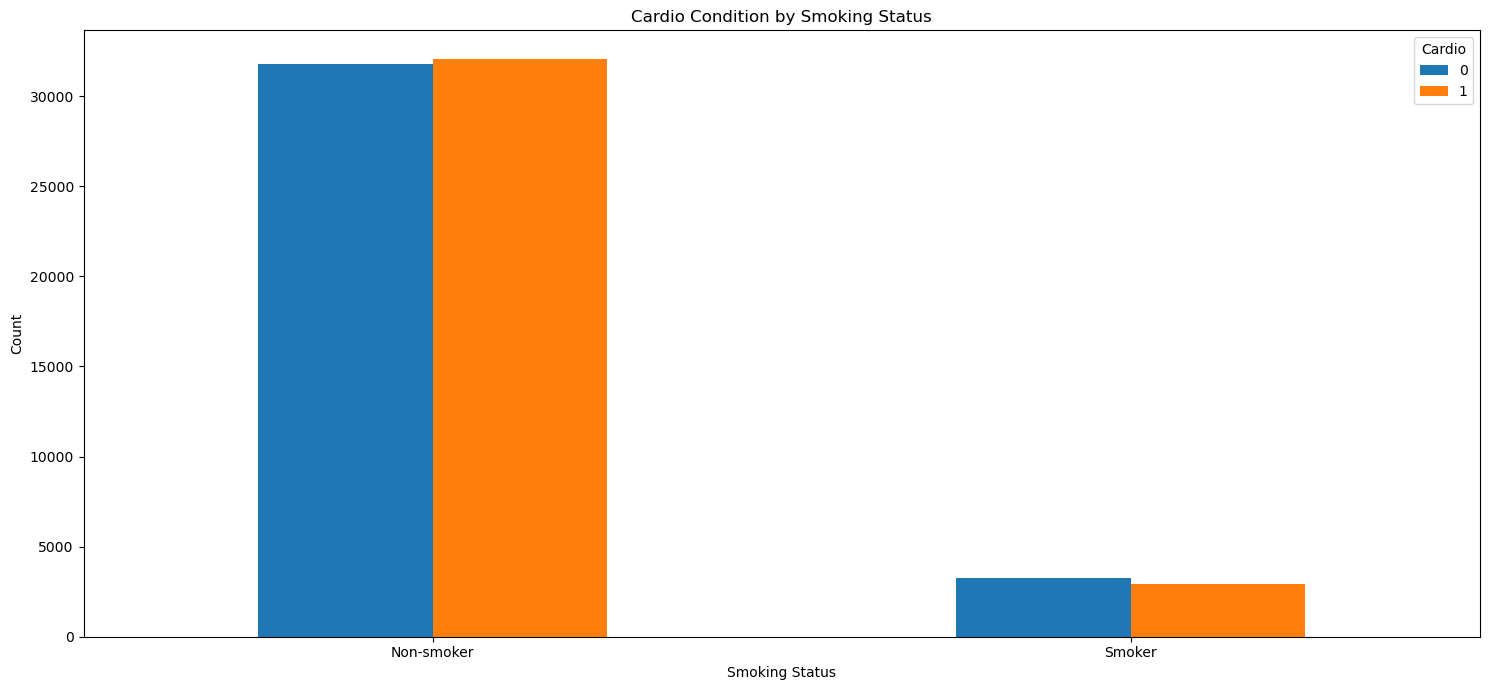

In [444]:
# plotting bar graph of smokers vs cardio
grouped_smoker = df_clean.groupby(["smoke", "cardio"]).size().unstack()
ax = grouped_smoker.plot(kind="bar",figsize=(15,7))

# Set custom x-axis labels
ax.set_xticklabels(["Non-smoker", "Smoker"], rotation=0)
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.title("Cardio Condition by Smoking Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

We observe that **smokers and non-smokers exhibit a similar risk** of developing cardiovascular disease in this dataset. This suggests that, based on the available data, **smoking may not be a strong differentiating factor** for cardiovascular risk, though this could be influenced by other confounding variables.


### *Cardio Condition By Alcohol Status*

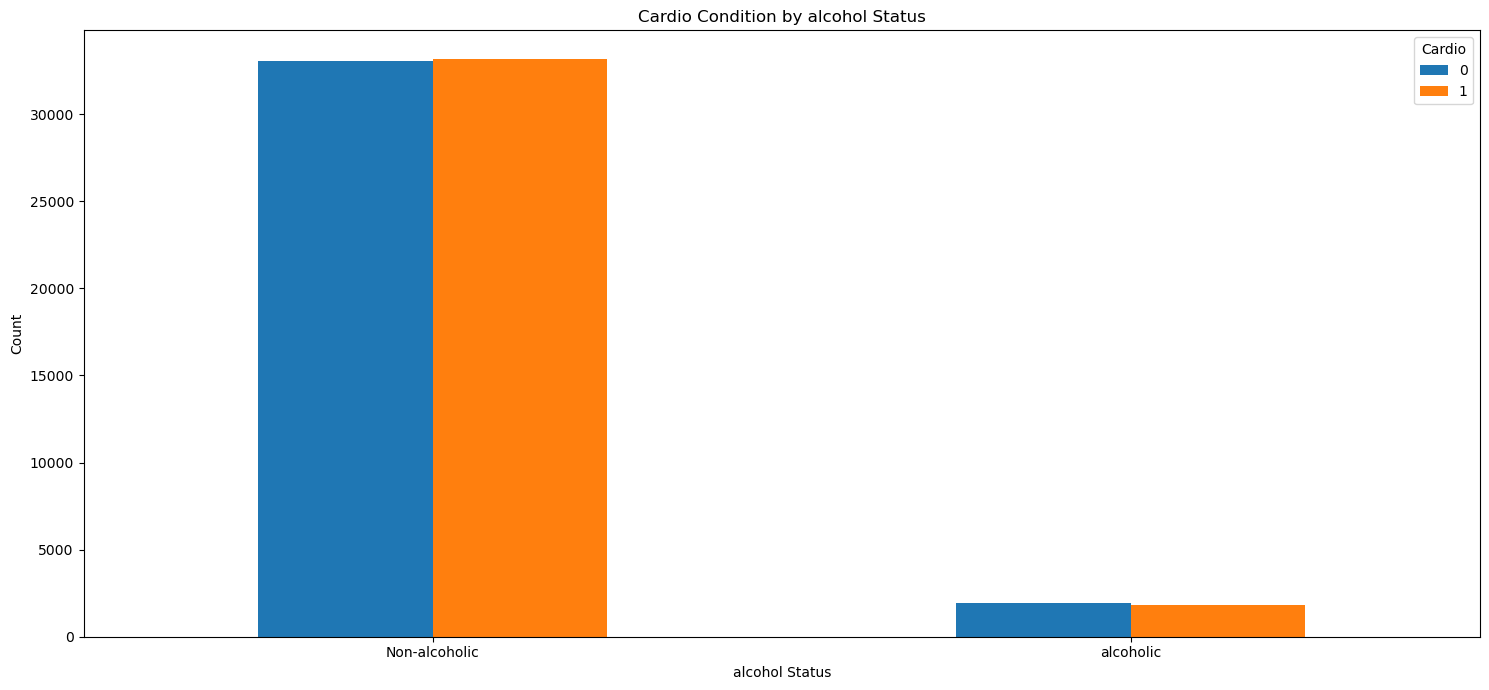

In [445]:
# ploting bar graph of alcohol vs cardio
grouped_alcohol = df_clean.groupby(["alco", "cardio"]).size().unstack()
ax = grouped_alcohol.plot(kind="bar",figsize=(15,7))

# Set custom x-axis labels
ax.set_xticklabels(["Non-alcoholic", "alcoholic"], rotation=0)
plt.xlabel("alcohol Status")
plt.ylabel("Count")
plt.title("Cardio Condition by alcohol Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

The data shows that **alcoholics and non-alcoholics have a similar risk** of developing cardiovascular disease. This suggests that **alcohol consumption may not be a distinguishing factor** for cardiovascular risk in this dataset, although other underlying variables could be at play.


### *Cardio Condition By Cholesterol Level*

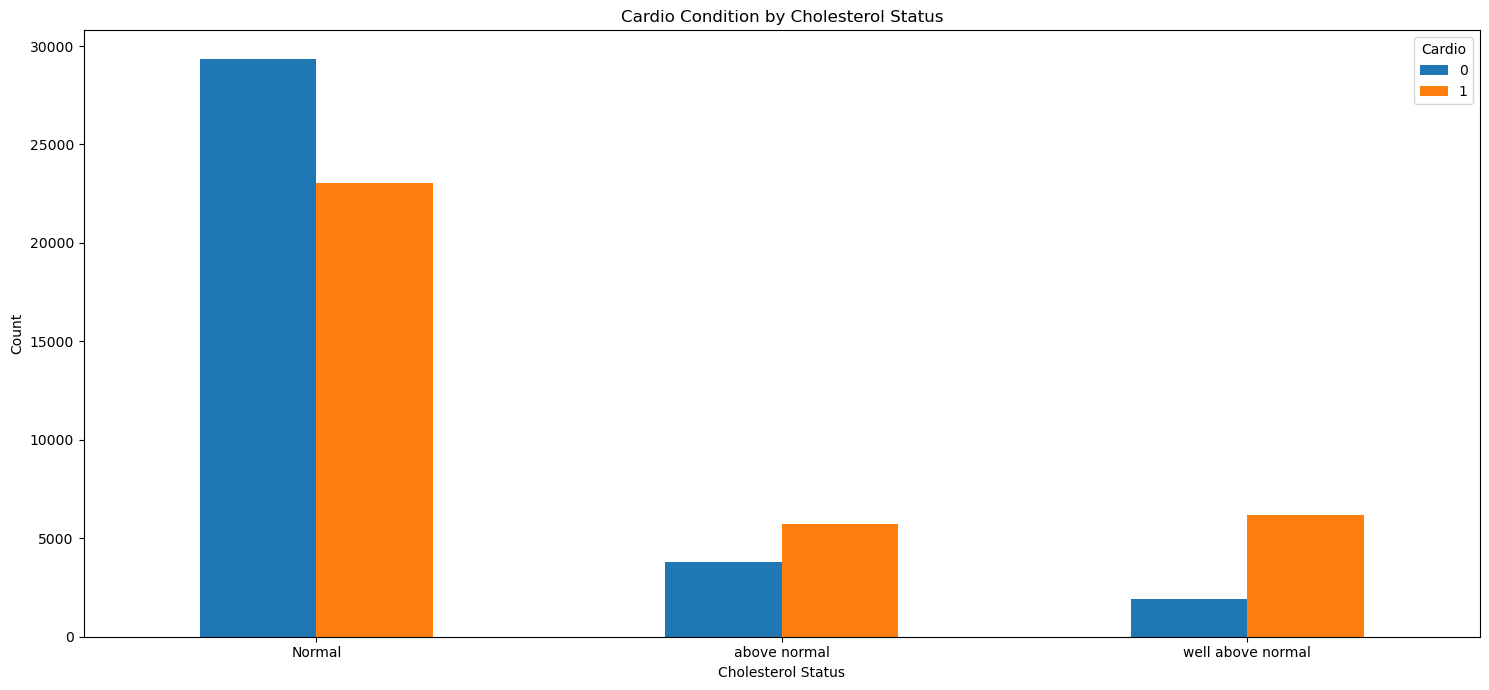

In [446]:
# plotting bar graph of smokers vs cardio
grouped_chole = df_clean.groupby(["cholesterol", "cardio"]).size().unstack()
ax = grouped_chole.plot(kind="bar",figsize=(15,7))

# Set custom x-axis labels
ax.set_xticklabels(["Normal", "above normal","well above normal"], rotation=0)
plt.xlabel("Cholesterol Status")
plt.ylabel("Count")
plt.title("Cardio Condition by Cholesterol Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

From the plot, we observe that individuals with **normal cholesterol levels** are at a **lower risk** of developing cardiovascular disease. In contrast, those with **well above normal** cholesterol levels face the **highest risk**, followed by those with **above normal** levels. This suggests a strong positive correlation between elevated cholesterol and cardiovascular risk.



### *Cardio Condition By Physical Activity*

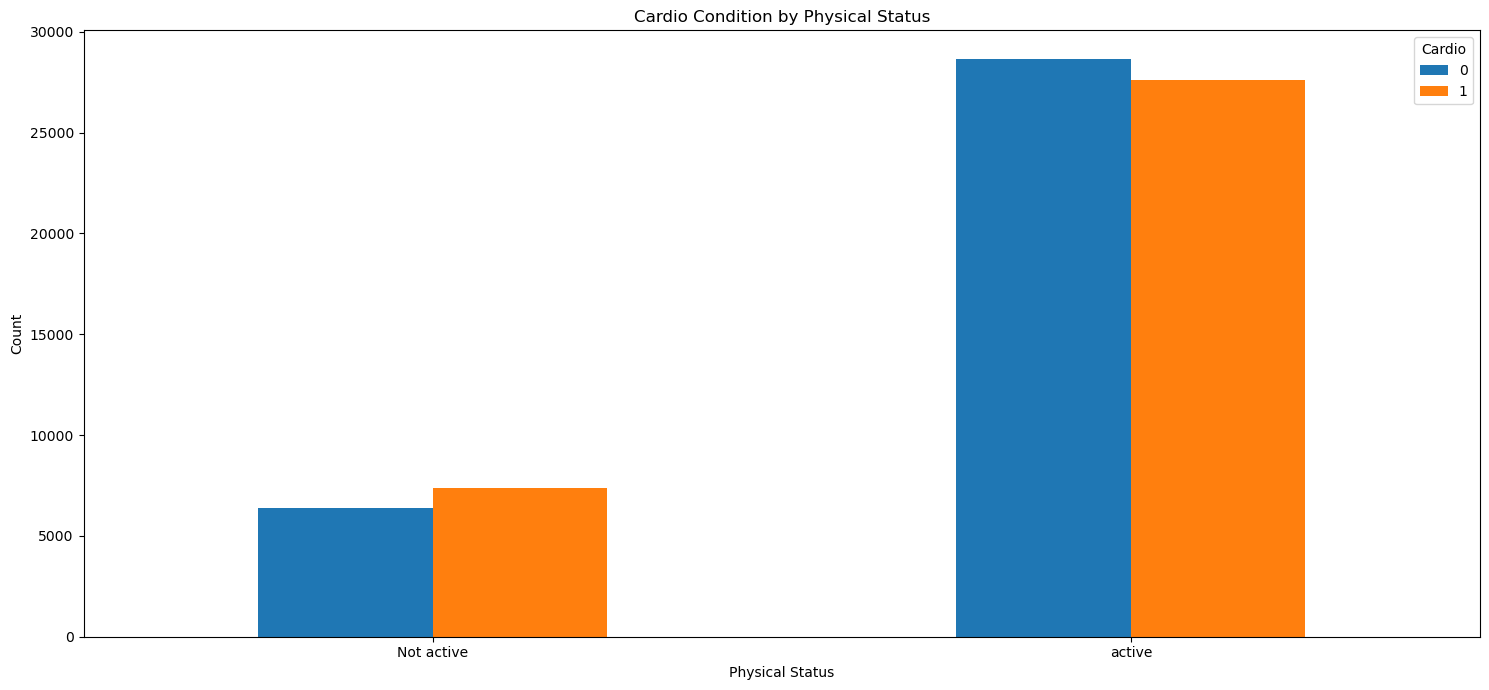

In [447]:
# plotting bar graph of physical activity vs cardio condition
grouped_phyc = df_clean.groupby(["active", "cardio"]).size().unstack()
ax = grouped_phyc.plot(kind="bar",figsize=(15,7))

# Set custom x-axis labels
ax.set_xticklabels(["Not active", "active"], rotation=0)
plt.xlabel("Physical Status")
plt.ylabel("Count")
plt.title("Cardio Condition by Physical Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

From the plot, we observe that individuals who are **not physically active** have a **higher risk** of developing cardiovascular disease, while those who engage in **regular physical activity** show a **lower risk**. This highlights the potential protective effect of physical activity on heart health.


### *Cardio Condition By Glucose Level*

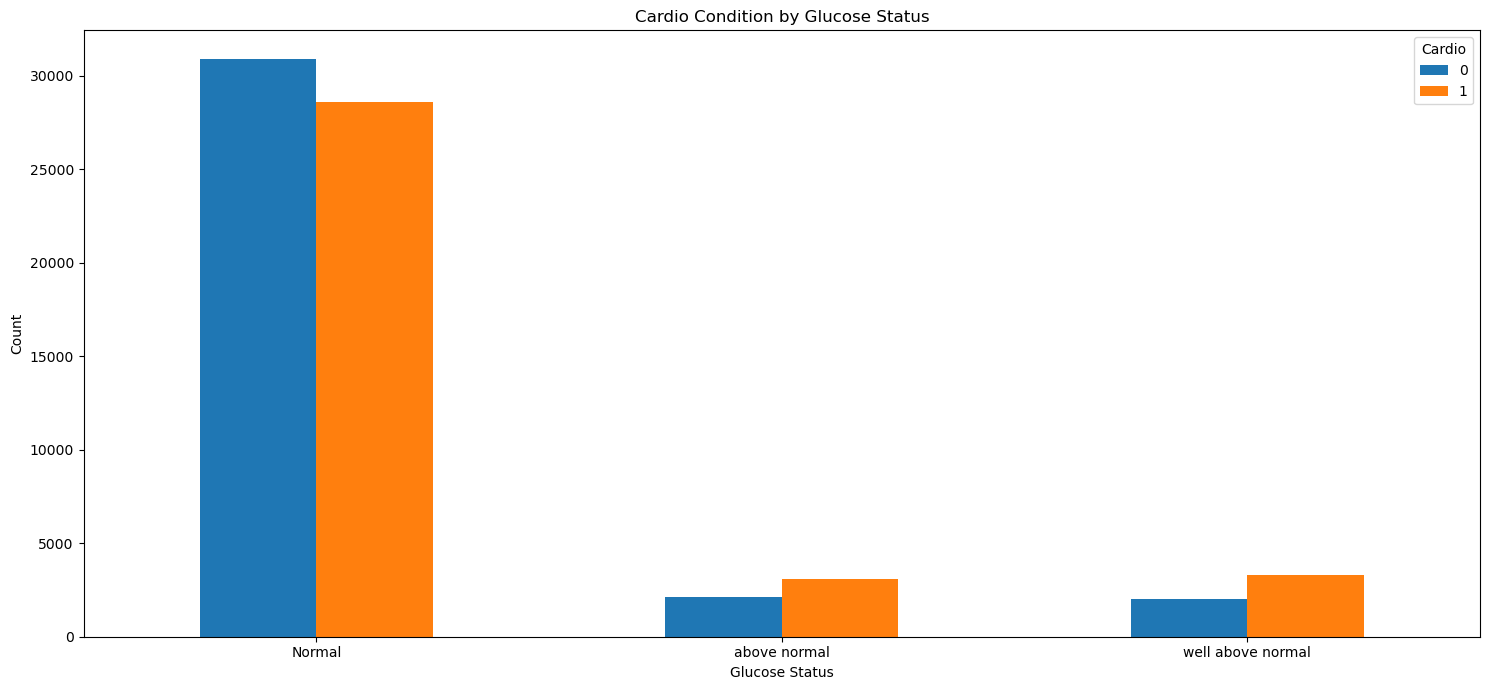

In [448]:
# plotting bar graph of glucose vs cardio
grouped_gluc = df_clean.groupby(["gluc", "cardio"]).size().unstack()
ax = grouped_gluc.plot(kind="bar",figsize=(15,7))

# Set custom x-axis labels
ax.set_xticklabels(["Normal", "above normal","well above normal"], rotation=0)
plt.xlabel("Glucose Status")
plt.ylabel("Count")
plt.title("Cardio Condition by Glucose Status")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

The plot indicates that individuals with **well above normal glucose levels** face the **highest risk** of developing cardiovascular disease, followed by those with **above normal** glucose levels. In contrast, those with **normal glucose levels** are at a **lower risk**, suggesting a clear association between elevated glucose levels and cardiovascular risk.



### *Cardio Condition By Gender*

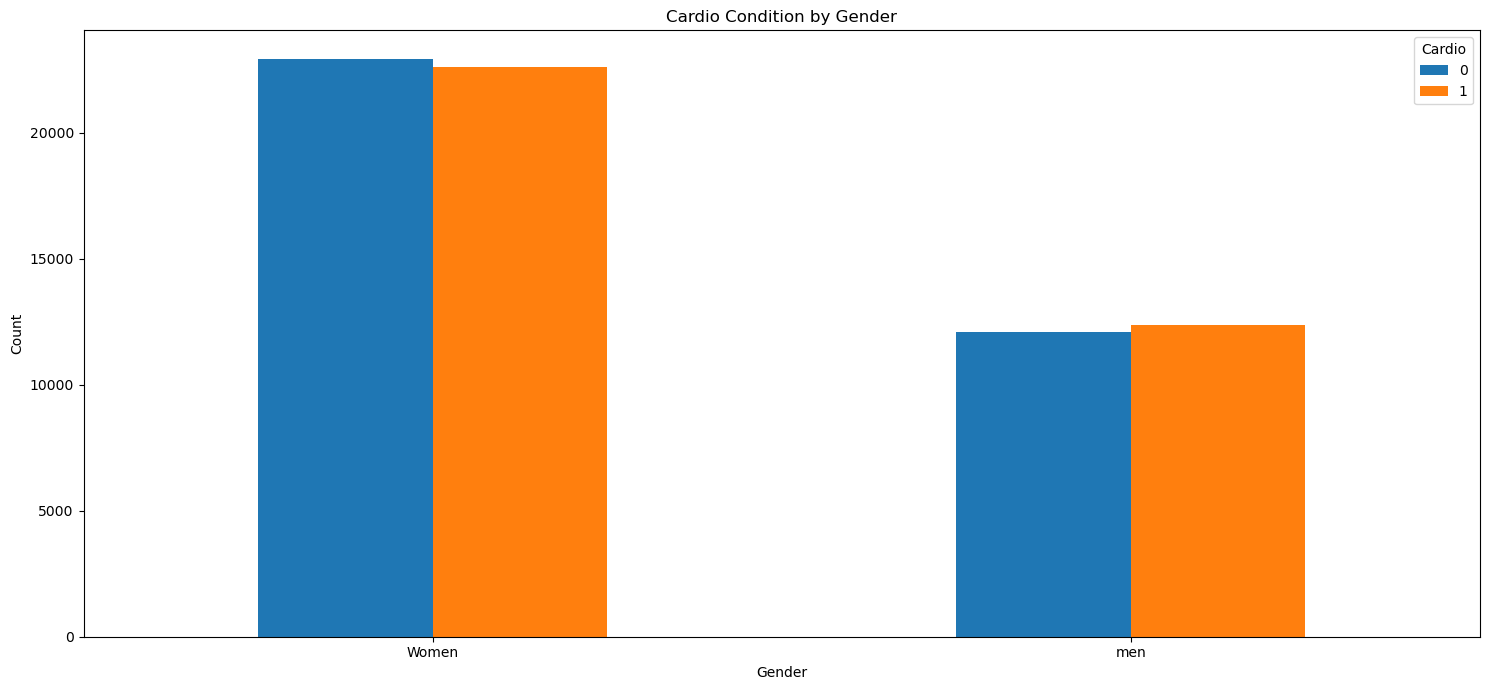

In [449]:
# plotting bar graph of smokers vs cardio
grouped_gender = df_clean.groupby(["gender", "cardio"]).size().unstack()
ax = grouped_gender.plot(kind="bar",figsize=(15,7))

# Set custom x-axis labels
ax.set_xticklabels(["Women", "men"], rotation=0)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Cardio Condition by Gender")
plt.legend(title="Cardio")
plt.tight_layout()
plt.show()

The data shows that **men have a slightly higher risk** of developing cardiovascular disease compared to women. This suggests a modest gender-related difference in cardiovascular risk within the dataset.


### *Cardio Condition By Age Group*

C:\Users\HomePC\AppData\Local\Temp\ipykernel_18712\877401528.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age=df_clean.groupby(["age_group","cardio"])[["age_group","cardio"]].size().unstack().copy()


Text(0.5, 1.0, 'Cardio Condition by Age Group')

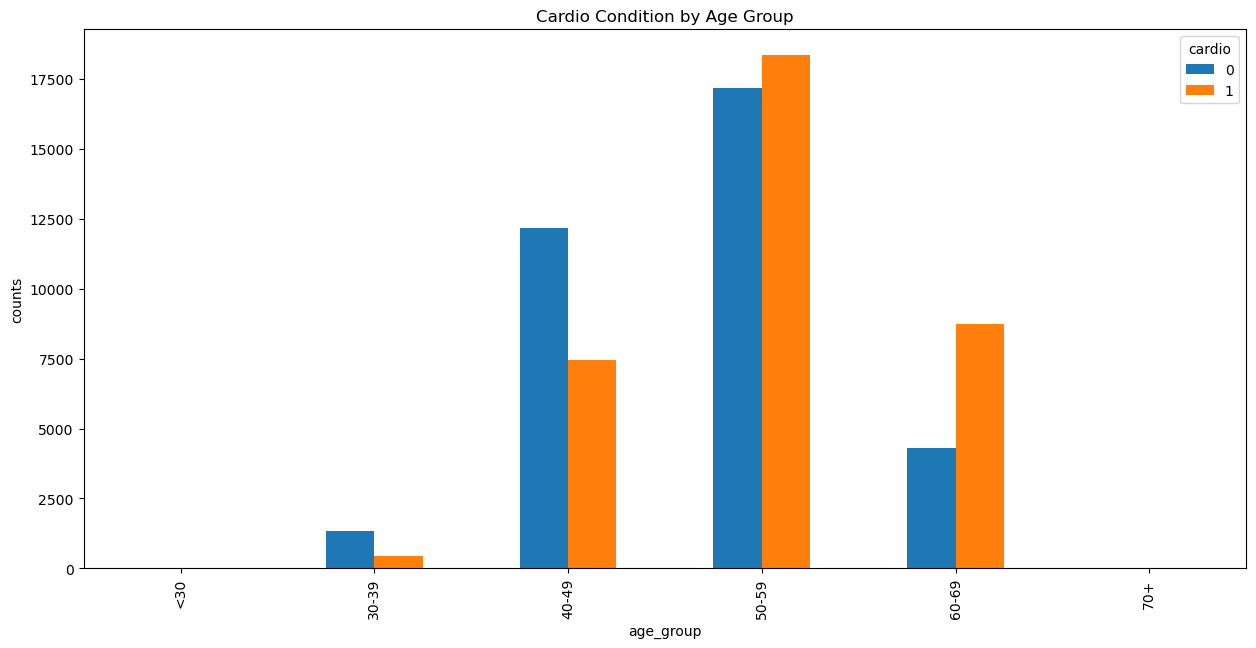

In [450]:

# Define bins and labels
bins = [0, 29, 39, 49, 59, 69, 120]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']

# Create age groups
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels,right=True)
grouped_age=df_clean.groupby(["age_group","cardio"])[["age_group","cardio"]].size().unstack().copy()
ax=grouped_age.plot(kind="bar",figsize=(15,7))
ax.set_ylabel("counts")
ax.set_xlabel("age_group")
ax.set_title("Cardio Condition by Age Group")




The analysis reveals that individuals **above the age of 50** have a **higher risk** of developing cardiovascular disease, with those **over 60 years old** facing the **highest risk**. Conversely, **younger individuals under 50** have a **lower risk** of developing cardiovascular disease, indicating a clear age-related increase in risk.


C:\Users\HomePC\AppData\Local\Temp\ipykernel_18712\1957930940.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_bmi=df_clean.groupby(["BMI_group","cardio"]).size().unstack()


Text(0.5, 1.0, 'Cardio Condition by BMI Group')

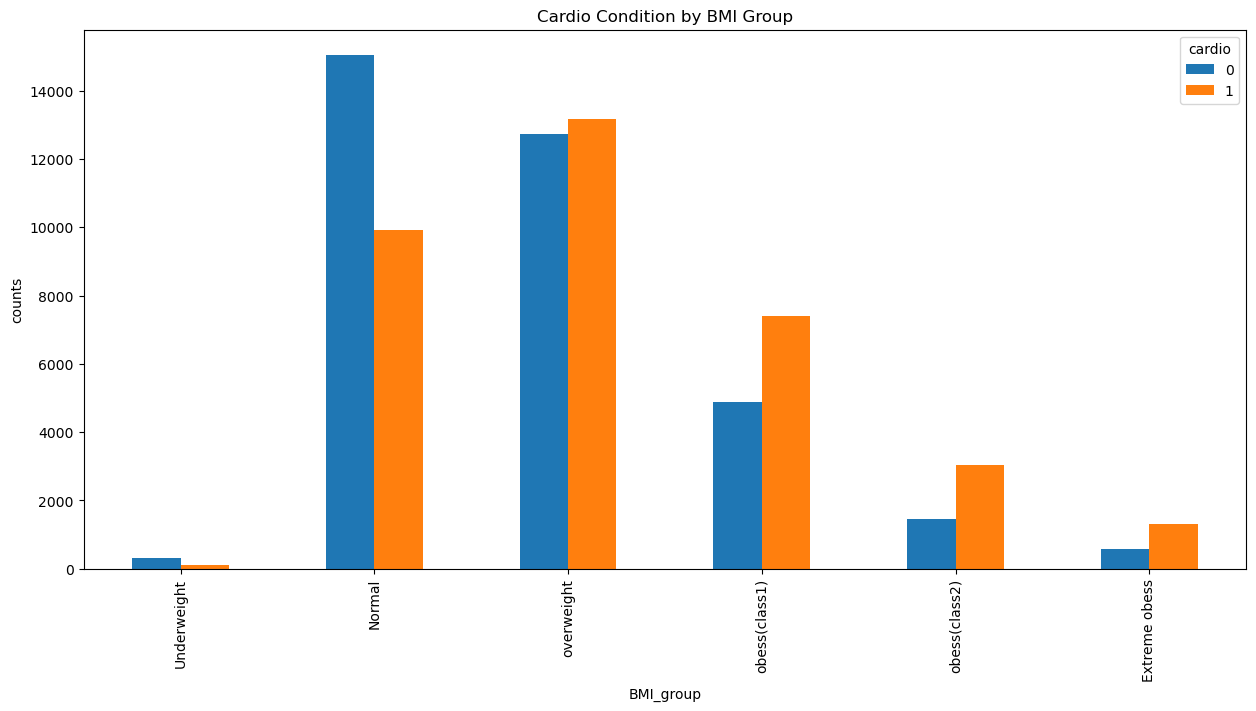

In [451]:
# Define Bins and labels
bins=[0,18,24.9,29.9,34.9,39.9,204]
labels=["Underweight","Normal","overweight","obess(class1)","obess(class2)","Extreme obess"]
df_clean["BMI_group"]=pd.cut(df_clean["BMI"],bins=bins,labels=labels,right=True)
grouped_bmi=df_clean.groupby(["BMI_group","cardio"]).size().unstack()
ax=grouped_bmi.plot(kind="bar",figsize=(15,7))
ax.set_ylabel("counts")
ax.set_xlabel("BMI_group")
ax.set_title("Cardio Condition by BMI Group")

We observe that individuals with **underweight** or **normal weight** classifications tend to have a **lower risk of cardiovascular disease**. In contrast, those categorized as **overweight**, **obese (Class I)**, **obese (Class II)**, and **extremely obese** show a **progressively higher risk**, with the likelihood of cardiovascular disease increasing across these categories.

These observations suggest a potential link between **increased body weight** and **greater susceptibility to cardiovascular conditions**, indicating that weight management may be an important factor in reducing cardiovascular risk.






## **Data Preprocessing**

## *Label Encoding the Gender Column*


In [452]:
df_preprocess=df_clean.copy()
df_preprocess["gender"].replace({"1":0,"2":1},inplace=True)
df_preprocess.sample(5)


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,pulse_pressure,age_group,BMI_group
15705,22434.0,63,1,14.0,110.0,2,1,0,1,1,1,31.887755,-96.0,60-69,obess(class1)
7629,10888.0,61,0,140.0,90.0,1,1,0,0,0,1,21.484375,50.0,60-69,Normal
50121,71529.0,59,1,120.0,80.0,1,3,0,0,1,0,24.725183,40.0,50-59,Normal
12076,17247.0,51,0,120.0,70.0,1,1,0,0,0,0,23.875433,50.0,50-59,Normal
245,337.0,47,1,150.0,100.0,3,1,1,0,0,1,25.148605,50.0,40-49,overweight


## *dropping unnecessary columns*


In [453]:
df_preprocess.drop(["BMI_group","age_group","id"],axis=1,inplace=True)

## *defining features and the target*

In [454]:
# defining x and y
X=df_preprocess.drop(["cardio"],axis=1)
y=df_preprocess["cardio"].astype(int)
# defining continuous and categorical columns
cont_columns=["age","ap_hi","ap_lo","BMI","pulse_pressure"]
X_cont=X[cont_columns]
X_cat=X.drop(cont_columns,axis=1).astype(int)

## *Normalizing Columns*

In [455]:
# instatiating the scaler
scaler=MinMaxScaler()
# scaling and changing the resulting array to a dataframe
X_scaled=pd.DataFrame(scaler.fit_transform(X_cont),index=X_cont.index,columns=X_cont.columns)
X_scaled.sample(5)


,age,ap_hi,ap_lo,BMI,pulse_pressure
17279,0.714286,0.016698,0.013550,0.066255,0.405385
60536,1.000000,0.016698,0.013550,0.071265,0.405385
26687,0.628571,0.016698,0.013550,0.062550,0.405385
3111,1.000000,0.018553,0.014363,0.067588,0.406171
58099,0.800000,0.020408,0.016260,0.082805,0.406507


In [456]:
# adding normalized columns to the rest of the columns
X=pd.concat([X_scaled,X_cat],axis=1)
X.sample(5)


,age,ap_hi,ap_lo,BMI,pulse_pressure,gender,cholesterol,gluc,smoke,alco,active
52215,0.600000,0.016698,0.013550,0.072841,0.405385,0,1,1,0,0,1
12644,0.542857,0.016698,0.012647,0.130224,0.405759,0,1,1,0,0,1
23294,0.571429,0.018553,0.012647,0.088464,0.406881,1,1,1,0,0,1
6383,0.771429,0.016079,0.012647,0.062897,0.405385,0,1,1,0,0,1
69293,0.942857,0.017934,0.014453,0.091314,0.405759,1,1,1,0,0,1


## **Modelling**

## *baseline logistic regression model*

We use the baseline model as an inferential tool to assess the overall significance of the model, as well as the statistical significance and impact of individual features.



In [457]:
#fitting a logistic reg model
model=sm.Logit(y,sm.add_constant(X))
results=model.fit(maxiter=200)
# viewing the model summary
results.summary()

Optimization terminated successfully.
         Current function value: 0.593036
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69989
Method:                           MLE   Df Model:                           10
Date:                Sat, 24 May 2025   Pseudo R-squ.:                  0.1444
Time:                        17:50:02   Log-Likelihood:                -41512.
converged:                       True   LL-Null:                       -48520.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -104.6441        nan        nan        nan         nan         nan
age                1.8758      0.045     41.564      0.000       1.787       1.964
ap_hi            511.5108        nan        nan        nan         nan         nan
ap_lo             97.3265        nan        nan        nan         nan         nan
BMI                9.6818      0.494     19.604      0.000       8.714      10.650
pulse_pressure   227.0732        nan        nan        nan         nan         nan
gender             0.0739      0.019      3.934      0.000       0.037       0.111
cholesterol        0.5256      0.015     35.122      0.000       0.496       0.555
gluc              -0.1134      0.017     -6.680      0.000      -0.147      -0.080
smoke             -0.1270      0.033     -3.837      0.000      -0.192      -0.062
alco              -0.1619      0.040     -4.035      0.000      -0.241      -0.083
active            -0.2112      0.021    -10.049      0.000      -0.252      -0.170
==================================================================================
"""

Based on the presence of NaN p-values, this indicates potential multicollinearity in the model. Therefore, it is important to address and resolve multicollinearity before interpreting the results further.

We will do so by dropping the `pulse_pressure` column

In [458]:
# dropping the pulse pressure column
X=X.drop("pulse_pressure",axis=1)

After fixing mutlticollinearity we model with the remaining column to see the perfomance of the model

In [459]:
# fitting an improved logreg model
model1=sm.Logit(y,sm.add_constant(X))
results1=model1.fit(maxiter=1e12)
# printing model summary
results1.summary()

Optimization terminated successfully.
         Current function value: 0.593036
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69989
Method:                           MLE   Df Model:                           10
Date:                Sat, 24 May 2025   Pseudo R-squ.:                  0.1444
Time:                        17:50:02   Log-Likelihood:                -41512.
converged:                       True   LL-Null:                       -48520.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -13.6110      0.163    -83.426      0.000     -13.931     -13.291
age             1.8758      0.045     41.564      0.000       1.787       1.964
ap_hi         648.8247      9.775     66.379      0.000     629.667     667.983
ap_lo           3.3212      0.747      4.447      0.000       1.857       4.785
BMI             9.6818      0.494     19.604      0.000       8.714      10.650
gender          0.0739      0.019      3.934      0.000       0.037       0.111
cholesterol     0.5256      0.015     35.122      0.000       0.496       0.555
gluc           -0.1134      0.017     -6.680      0.000      -0.147      -0.080
smoke          -0.1270      0.033     -3.837      0.000      -0.192      -0.062
alco           -0.1619      0.040     -4.035      0.000      -0.241      -0.083
active         -0.2112      0.021    -10.049      0.000      -0.252      -0.170
===============================================================================
"""

Based on the logistic regression results, the model is statistically significant, as indicated by the log-likelihood ratio p-value being well below the 0.05 threshold. This suggests that the model provides a better fit than a null model with no predictors.

Several features show strong and statistically significant associations with cardiovascular risk (CVR). Age, systolic blood pressure (ap_hi), diastolic blood pressure (ap_lo), BMI, cholesterol, and gender all have positive coefficients, meaning that increases in these features are associated with a higher likelihood of CVR. Notably, systolic blood pressure and BMI exhibit the strongest positive effects.

On the other hand, physical activity, alcohol use, smoking status, and glucose levels show negative associations with CVR. While the protective effect of physical activity aligns with expectations, the negative coefficients for glucose, smoking, and alcohol are counterintuitive. These may indicate issues such as class imbalance, multicollinearity, or data quality concerns, and should be further investigated.

Overall, the model demonstrates statistical significance and highlights several meaningful predictors of CVR, though some unexpected findings warrant additional analysis.

## *Train-test-split*

Here, we split the data into a training set and a testing set. The training set is used to train the model, while the testing set is reserved to evaluate how well the model generalizes to unseen data.


In [465]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## *Finding the best perfoming model*

Here, we use the average precision scores obtained through cross-validation to identify the best-performing model.


In [478]:
ridge_logreg=LogisticRegression(penalty="l2",max_iter=10000000)
rl_cv=cross_val_score(ridge_logreg,X_train,y_train,scoring="precision")
rl_cv=rl_cv.mean()
print(f"logistic regression precision {rl_cv}")


logistic regression precision 0.6526851246954819


In [479]:
DT_model=DecisionTreeClassifier()
cv_dt=cross_val_score(DT_model,X_train,y_train,scoring="precision")
cv_dt=cv_dt.mean()
print(f"Decision trees precision {cv_dt}")

Decision trees precision 0.6421571283764674


In [ ]:
rf=RandomForestClassifier()
rf_cv=cross_val_score(rf,X_train,y_train,scoring="precision")

In [481]:
print(f"random forest precision {rf_cv.mean()}")

random forest precision 0.6885191427162975


In [482]:
xb=XGBClassifier()
cv_xb=cross_val_score(xb,X_train,y_train,scoring="precision")


In [483]:
print(f"xgboost precision {cv_xb.mean()}")

xgboost precision 0.7514186826368389


From the precision comparisons from the cross-validation scores, we see that XGBoost performs well; hence, we will go ahead and use XGBoost as our preferred model. 

We chose **precision** as our evaluation metric because we aim to minimize false positives — ensuring that when the model predicts a person has cardiovascular disease, it is likely to be correct.


## *Validating the best model*

Here, we evaluate how well the XGBoost model generalizes to unseen data, aiming to check for signs of overfitting.


In [477]:
xb.fit(X_train,y_train)
y_train_pred=xb.predict(X_train)
print(classification_report(y_train,y_train_pred))
y_test_pred=xb.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77     28033
           1       0.78      0.72      0.75     27967

    accuracy                           0.76     56000
   macro avg       0.76      0.76      0.76     56000
weighted avg       0.76      0.76      0.76     56000

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



Based on the accuracy and precision scores obtained from both the training and test sets, we can infer that the model is not overfitting. The similarity between these scores indicates that the model generalizes well to unseen data and is not merely memorizing the training examples. If the model were overfitting, we would expect to see a significantly higher performance on the training set compared to the test set. The close alignment of these metrics demonstrates that the model maintains a good balance between bias and variance, ensuring reliable predictive performance on new data.